In [1]:
import pandas as pd
df1 = pd.read_csv("/content/Employee-Attrition.csv")

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pyspark

In [4]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark=SparkSession.builder.appName('Project').getOrCreate()

In [7]:
spark

In [8]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


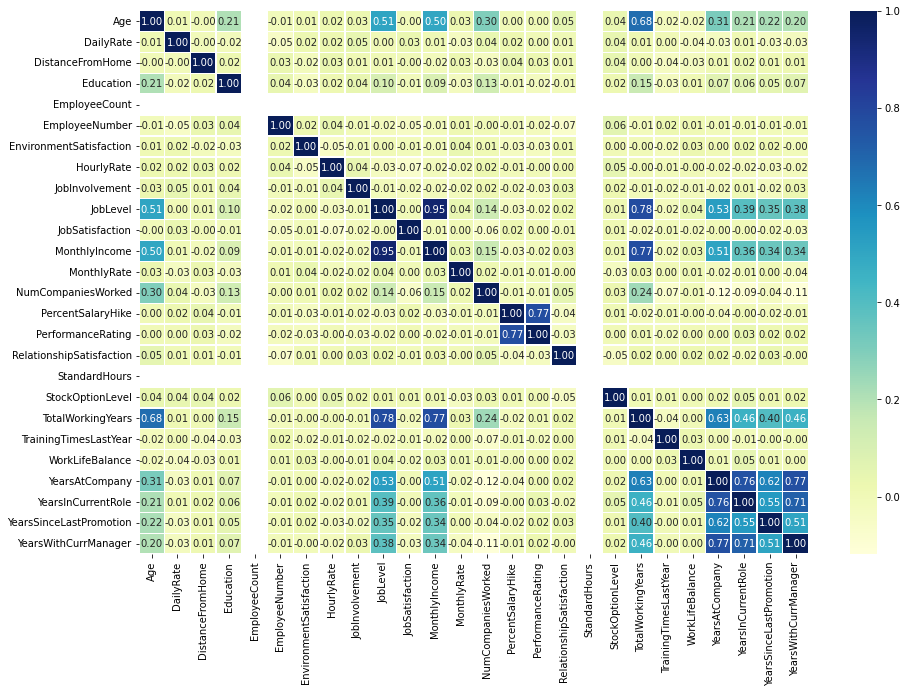

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_mat = df1.corr()
fig, ax=plt.subplots(figsize=(15,10))
sx = sns.heatmap(corr_mat,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap="YlGnBu")
plt.yticks(rotation=0);

In [10]:
df = spark.read.csv('/content/Employee-Attrition.csv',header=True,sep= ",",inferSchema=True)

In [11]:
df.show()

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [12]:
print((df.count(),len(df.columns)))

(1470, 35)


In [13]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [14]:
df.dtypes

[('Age', 'int'),
 ('Attrition', 'string'),
 ('BusinessTravel', 'string'),
 ('DailyRate', 'int'),
 ('Department', 'string'),
 ('DistanceFromHome', 'int'),
 ('Education', 'int'),
 ('EducationField', 'string'),
 ('EmployeeCount', 'int'),
 ('EmployeeNumber', 'int'),
 ('EnvironmentSatisfaction', 'int'),
 ('Gender', 'string'),
 ('HourlyRate', 'int'),
 ('JobInvolvement', 'int'),
 ('JobLevel', 'int'),
 ('JobRole', 'string'),
 ('JobSatisfaction', 'int'),
 ('MaritalStatus', 'string'),
 ('MonthlyIncome', 'int'),
 ('MonthlyRate', 'int'),
 ('NumCompaniesWorked', 'int'),
 ('Over18', 'string'),
 ('OverTime', 'string'),
 ('PercentSalaryHike', 'int'),
 ('PerformanceRating', 'int'),
 ('RelationshipSatisfaction', 'int'),
 ('StandardHours', 'int'),
 ('StockOptionLevel', 'int'),
 ('TotalWorkingYears', 'int'),
 ('TrainingTimesLastYear', 'int'),
 ('WorkLifeBalance', 'int'),
 ('YearsAtCompany', 'int'),
 ('YearsInCurrentRole', 'int'),
 ('YearsSinceLastPromotion', 'int'),
 ('YearsWithCurrManager', 'int')]

In [15]:
# DailyRate EmployeeCount EmployeeNumber MaritalStatus 

In [16]:
# my_data = df.drop(*['DailyRate', 'EmployeeCount','Over18'])
# my_data.columns

In [17]:
my_data = df

In [18]:
(my_data.count() , len(my_data.columns))

(1470, 35)

In [19]:
my_data.describe().show()

+-------+------------------+---------+--------------+------------------+---------------+----------------+------------------+----------------+-------------+-----------------+-----------------------+------+------------------+------------------+------------------+--------------------+------------------+-------------+-----------------+------------------+------------------+------+--------+------------------+-------------------+------------------------+-------------+------------------+------------------+---------------------+------------------+------------------+------------------+-----------------------+--------------------+
|summary|               Age|Attrition|BusinessTravel|         DailyRate|     Department|DistanceFromHome|         Education|  EducationField|EmployeeCount|   EmployeeNumber|EnvironmentSatisfaction|Gender|        HourlyRate|    JobInvolvement|          JobLevel|             JobRole|   JobSatisfaction|MaritalStatus|    MonthlyIncome|       MonthlyRate|NumCompaniesWorked|O

In [20]:
import pyspark.sql.functions as f

# null values in each column
data_agg = my_data.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in my_data.columns])
data_agg.show()

+---+---------+--------------+---------+----------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPr

In [21]:
my_data.groupBy('BusinessTravel').count().show()
print()
my_data.groupBy('Department').count().show()
print()
my_data.groupBy('Education').count().show()
print()
my_data.groupBy('EducationField').count().show()
print()
my_data.groupBy('Gender').count().show()
print()
my_data.groupBy('JobRole').count().show()
print()
my_data.groupBy('YearsAtCompany').count().show()
print()

+-----------------+-----+
|   BusinessTravel|count|
+-----------------+-----+
|Travel_Frequently|  277|
|       Non-Travel|  150|
|    Travel_Rarely| 1043|
+-----------------+-----+


+--------------------+-----+
|          Department|count|
+--------------------+-----+
|               Sales|  446|
|Research & Develo...|  961|
|     Human Resources|   63|
+--------------------+-----+


+---------+-----+
|Education|count|
+---------+-----+
|        1|  170|
|        3|  572|
|        5|   48|
|        4|  398|
|        2|  282|
+---------+-----+


+----------------+-----+
|  EducationField|count|
+----------------+-----+
|Technical Degree|  132|
|           Other|   82|
|       Marketing|  159|
|         Medical|  464|
|   Life Sciences|  606|
| Human Resources|   27|
+----------------+-----+


+------+-----+
|Gender|count|
+------+-----+
|Female|  588|
|  Male|  882|
+------+-----+


+--------------------+-----+
|             JobRole|count|
+--------------------+-----+
|     Sales Exec

In [22]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
my_data1 = df

In [24]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# create object of StringIndexer class and specify input and output column
SI_Attrition = StringIndexer(inputCol='Attrition',outputCol='Attrition_Index')
SI_BusinessTravel = StringIndexer(inputCol='BusinessTravel',outputCol='BusinessTravel_Index')
SI_Department = StringIndexer(inputCol='Department',outputCol='Department_Index')
SI_Education = StringIndexer(inputCol='Education',outputCol='Education_Index')
SI_EducationField = StringIndexer(inputCol='EducationField',outputCol='EducationField_Index')
SI_EnvironmentSatisfaction = StringIndexer(inputCol='EnvironmentSatisfaction',outputCol='EnvironmentSatisfaction_Index')
SI_Gender = StringIndexer(inputCol='Gender',outputCol='Gender_Index')
SI_JobInvolvement = StringIndexer(inputCol='JobInvolvement',outputCol='JobInvolvement_Index')
SI_JobRole = StringIndexer(inputCol='JobRole',outputCol='JobRole_Index')
SI_JobSatisfaction = StringIndexer(inputCol='JobSatisfaction',outputCol='JobSatisfaction_Index')
SI_MaritalStatus = StringIndexer(inputCol='MaritalStatus',outputCol='MaritalStatus_Index')
SI_Over18 = StringIndexer(inputCol='Over18',outputCol='Over18_Index')
SI_OverTime = StringIndexer(inputCol='OverTime',outputCol='OverTime_Index')
SI_PerformanceRating = StringIndexer(inputCol='PerformanceRating',outputCol='PerformanceRating_Index')
SI_RelationshipSatisfaction = StringIndexer(inputCol='RelationshipSatisfaction',outputCol='RelationshipSatisfaction_Index')
SI_WorkLifeBalance = StringIndexer(inputCol='WorkLifeBalance',outputCol='WorkLifeBalance_Index')

SI_Attrition,SI_BusinessTravel,SI_Department,SI_Education,SI_EducationField,SI_EnvironmentSatisfaction,SI_Gender,SI_JobInvolvement

# transform the data
my_data = SI_Attrition.fit(my_data).transform(my_data)
my_data = SI_BusinessTravel.fit(my_data).transform(my_data)
my_data = SI_Department.fit(my_data).transform(my_data)
my_data = SI_Education.fit(my_data).transform(my_data)
my_data = SI_EducationField.fit(my_data).transform(my_data)
my_data = SI_EnvironmentSatisfaction.fit(my_data).transform(my_data)
my_data = SI_Gender.fit(my_data).transform(my_data)
my_data = SI_JobInvolvement.fit(my_data).transform(my_data)
my_data = SI_JobRole.fit(my_data).transform(my_data)
my_data = SI_JobSatisfaction.fit(my_data).transform(my_data)
my_data = SI_MaritalStatus.fit(my_data).transform(my_data)
my_data = SI_Over18.fit(my_data).transform(my_data)
my_data = SI_OverTime.fit(my_data).transform(my_data)
my_data = SI_PerformanceRating.fit(my_data).transform(my_data)
my_data = SI_RelationshipSatisfaction.fit(my_data).transform(my_data)
my_data = SI_WorkLifeBalance.fit(my_data).transform(my_data)

In [25]:
my_data.show(10)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------------+--------------------+----------------+---------------+--------------------+-----------------------------+------------+--------------------+-------------+---------------------+-------------------+------------+--------------+-----------------------+------------------------------+---------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|Environm

In [26]:
# create object and specify input and output column
OHE = OneHotEncoder(inputCols=['Attrition_Index', 'BusinessTravel_Index','Department_Index','Education_Index','EducationField_Index','EnvironmentSatisfaction_Index','Gender_Index','JobInvolvement_Index','JobRole_Index','JobSatisfaction_Index','MaritalStatus_Index','OverTime_Index','PerformanceRating_Index','RelationshipSatisfaction_Index','WorkLifeBalance_Index'],outputCols=['Attrition_OHE', 'BusinessTravel_OHE','Department_OHE','Education_OHE','EducationField_OHE','EnvironmentSatisfaction_OHE','Gender_OHE','JobInvolvement_OHE','JobRole_OHE','JobSatisfaction_OHE','MaritalStatus_OHE','OverTime_OHE','PerformanceRating_OHE','RelationshipSatisfaction_OHE','WorkLifeBalance_OHE'])

# transform the data
my_data = OHE.fit(my_data).transform(my_data)

# view and transform the data
my_data.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------------+--------------------+----------------+---------------+--------------------+-----------------------------+------------+--------------------+-------------+---------------------+-------------------+------------+--------------+-----------------------+------------------------------+---------------------+-------------+------------------+--------------+-------------+------------------+---------------------------+-------------+------------------+--

In [27]:
# for columns in ['Attrition_OHE', 'BusinessTravel_OHE','Department_OHE','Education_OHE','EducationField_OHE','EnvironmentSatisfaction_OHE','Gender_OHE','JobInvolvement_OHE','JobRole_OHE','JobSatisfaction_OHE','MaritalStatus_OHE','OverTime_OHE','PerformanceRating_OHE','RelationshipSatisfaction_OHE','WorkLifeBalance_OHE']:
#   my_data[columns] = my_data[columns].astype('vector')


In [28]:
my_data.dtypes

[('Age', 'int'),
 ('Attrition', 'string'),
 ('BusinessTravel', 'string'),
 ('DailyRate', 'int'),
 ('Department', 'string'),
 ('DistanceFromHome', 'int'),
 ('Education', 'int'),
 ('EducationField', 'string'),
 ('EmployeeCount', 'int'),
 ('EmployeeNumber', 'int'),
 ('EnvironmentSatisfaction', 'int'),
 ('Gender', 'string'),
 ('HourlyRate', 'int'),
 ('JobInvolvement', 'int'),
 ('JobLevel', 'int'),
 ('JobRole', 'string'),
 ('JobSatisfaction', 'int'),
 ('MaritalStatus', 'string'),
 ('MonthlyIncome', 'int'),
 ('MonthlyRate', 'int'),
 ('NumCompaniesWorked', 'int'),
 ('Over18', 'string'),
 ('OverTime', 'string'),
 ('PercentSalaryHike', 'int'),
 ('PerformanceRating', 'int'),
 ('RelationshipSatisfaction', 'int'),
 ('StandardHours', 'int'),
 ('StockOptionLevel', 'int'),
 ('TotalWorkingYears', 'int'),
 ('TrainingTimesLastYear', 'int'),
 ('WorkLifeBalance', 'int'),
 ('YearsAtCompany', 'int'),
 ('YearsInCurrentRole', 'int'),
 ('YearsSinceLastPromotion', 'int'),
 ('YearsWithCurrManager', 'int'),
 ('At

['Attrition_OHE', 'BusinessTravel_OHE','Department_OHE','Education_OHE','EducationField_OHE','EnvironmentSatisfaction_OHE','Gender_OHE','JobInvolvement_OHE','JobRole_OHE','JobSatisfaction_OHE','MaritalStatus_OHE','OverTime_OHE','PerformanceRating_OHE','RelationshipSatisfaction_OHE','WorkLifeBalance_OHE','Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [29]:
from pyspark.ml.feature import VectorAssembler

# specify the input and output columns of the vector assembler
assembler = VectorAssembler(inputCols=['BusinessTravel_OHE','Department_OHE','Education_OHE','EducationField_OHE','EnvironmentSatisfaction_OHE','Gender_OHE','JobInvolvement_OHE','JobRole_OHE','JobSatisfaction_OHE','MaritalStatus_OHE','OverTime_OHE','PerformanceRating_OHE','RelationshipSatisfaction_OHE','WorkLifeBalance_OHE','Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
                           outputCol='features')

# fill the null values
my_data = my_data.fillna(0)

# transform the data
final_data = assembler.transform(my_data)

In [30]:
# from pyspark.ml.feature import VectorAssembler

# # specify the input and output columns of the vector assembler
# assembler = VectorAssembler(inputCols=['BusinessTravel_OHE','Department_OHE','Education_OHE','EducationField_OHE','EnvironmentSatisfaction_OHE','Gender_OHE','JobInvolvement_OHE','JobRole_OHE','JobSatisfaction_OHE','MaritalStatus_OHE','OverTime_OHE','PerformanceRating_OHE','RelationshipSatisfaction_OHE','WorkLifeBalance_OHE'],
#                            outputCol='features')

# # transform the data
# final_data = assembler.transform(my_data)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

In [31]:
# from pyspark.ml.feature import VectorAssembler

# # specify the input and output columns of the vector assembler
# assembler = VectorAssembler(inputCols=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
#                            outputCol='features')

# # transform the data
# final_data = assembler.transform(my_data)

['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [32]:
# view the transformed vector
final_data.select('features','Attrition_Index').show()

+--------------------+---------------+
|            features|Attrition_Index|
+--------------------+---------------+
|(59,[0,3,6,8,15,1...|            1.0|
|(59,[1,2,7,8,13,1...|            0.0|
|(59,[0,2,6,12,14,...|            1.0|
|(59,[1,2,5,8,14,1...|            0.0|
|(59,[0,2,7,9,16,1...|            0.0|
|(59,[1,2,6,8,14,1...|            0.0|
|(59,[0,2,4,9,13,1...|            0.0|
|(59,[0,2,7,8,14,1...|            0.0|
|(59,[1,2,4,8,14,1...|            0.0|
|(59,[0,2,4,9,13,1...|            0.0|
|(59,[0,2,4,9,16,1...|            0.0|
|(59,[0,2,6,8,14,1...|            0.0|
|(59,[0,2,7,8,16,1...|            0.0|
|(59,[0,2,6,9,15,1...|            0.0|
|(59,[0,2,4,8,13,1...|            1.0|
|(59,[0,2,5,8,15,1...|            0.0|
|(59,[0,2,6,8,16,1...|            0.0|
|(59,[2,6,9,14,16,...|            0.0|
|(59,[0,3,5,8,18,2...|            0.0|
|(59,[0,2,4,8,14,1...|            0.0|
+--------------------+---------------+
only showing top 20 rows



In [33]:
#Model_Dataframe
model_df = final_data.select(['features','Attrition_Index'])
model_df = model_df.withColumnRenamed("Attrition_Index","label")
model_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)



In [34]:
#Split into training & testing Dataframe
training_df,test_df = model_df.randomSplit([0.80,0.20])

In [35]:
#Create a logistic regression model object
from pyspark.ml.classification import LogisticRegression
log_reg=LogisticRegression().fit(training_df)


lr_summary=log_reg.summary

#Overall accuracy of the classification model
print(lr_summary.accuracy)

#Area under ROC
#print(lr_summary.areaUnderROC)

0.8996598639455783


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


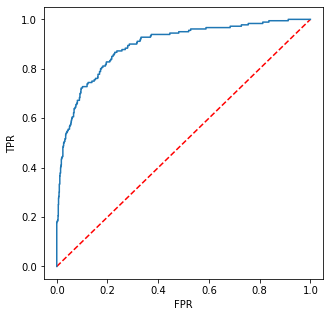

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(log_reg.summary.roc.select('FPR').collect(),
         log_reg.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [37]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

model = NaiveBayes(smoothing=1.0, modelType="multinomial").fit(training_df)

predictions = model.transform(test_df)
# predictions.show()

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.46258503401360546


In [38]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(training_df)
predictions = rfModel.transform(test_df)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
#print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.7335497835497835


In [39]:
from pyspark.ml.classification import LogisticRegression 

logistic = LogisticRegression().fit(training_df)

prediction = logistic.transform(test_df)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %s" % (accuracy))
#print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.8339917493101658


In [40]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

gbt = GBTClassifier(maxIter=100, maxDepth=4)
gbtModel = gbt.fit(training_df)
prediction = gbtModel.transform(test_df)

# gbtEval = BinaryClassificationEvaluator()
# gbtROC = gbtEval.evaluate(gbtPreds, {gbtEval.metricName: "areaUnderROC"})
# print("Test Area Under ROC: " + str(gbtROC))

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %s" % (accuracy))
#print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.8407747989852005


In [41]:
from pyspark.ml.classification import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(training_df)

prediction = DT.transform(test_df)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator.evaluate(prediction)
print("Accuracy = %s" % (accuracy))
#print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.7680027850338514


In [42]:
from pyspark.ml.classification import LinearSVC

lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(training_df)

# Print the coefficients and intercept for linear SVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))


Coefficients: [-0.00983493029374786,0.2664733794006611,-0.10963928545664864,0.05712999872292102,0.0681641459198843,0.004154554227100169,0.0673614099642338,-0.07991941018817982,-0.03923842039904132,-0.06891653342359662,0.014240876305597207,0.1811801694423012,-0.0943798525860559,-0.1990336743569426,-0.27896231566115337,-0.11788449227992374,0.1404455288050625,-0.15528191093315505,-0.0,-0.3419927013348584,-0.005815156611468886,-0.04426097621446839,0.15640738816041766,-0.11987511133783546,-0.05769781406201062,-0.020946237513023526,0.1530398291096206,-0.1888257129725202,-0.16965234691079645,-0.06565377502580426,0.12283080967539384,-0.04743942587345962,0.17878832603230294,-0.4810426255936943,-0.01773233267473688,-0.1028016460415402,-0.24824515223856455,-0.10467754979617873,-0.22908400467426607,-0.12125558875079047,-0.0,-0.01063181075031018,-0.00010039539124897006,0.010301758119336793,0.0,-5.235079458708657e-05,0.0023540084127498086,-0.05461427647690614,5.285903563674964e-06,0.0489145225582025

In [43]:
from pyspark.ml.classification import FMClassifier

fm = FMClassifier(labelCol="label", featuresCol="features", stepSize=0.001)

model = fm.fit(training_df)

predictions = model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = %g" % accuracy)

Test set accuracy = 0.445578
